In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('drive/MyDrive/data_CKD_MI.csv')

In [4]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,0,1,0,0,121,...,44,7800,5.2,1,2,0,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,38,6000,4.8,0,1,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,31,7500,4.8,0,2,0,1,0,1,0
3,48,70,1.005,4,0,1,0,1,0,117,...,32,6700,3.9,1,1,0,1,1,1,0
4,51,80,1.010,2,0,1,1,0,0,106,...,35,7300,4.6,0,1,0,0,0,0,0


In [5]:
dataset = dataset[['age','bp','al','su','bgr','bu','sc','hemo','pcv','wc','htn','appet','pe','ane','classification']]  #chi2

In [6]:
dataset

,age,bp,al,su,bgr,bu,sc,hemo,pcv,wc,htn,appet,pe,ane,classification
0,48,80,1,0,121,36.0,1.2,15.4,44,7800,1,0,0,0,0
1,7,50,4,0,121,18.0,0.8,11.3,38,6000,0,0,0,0,0
2,62,80,2,3,423,53.0,1.8,9.6,31,7500,0,1,0,1,0
3,48,70,4,0,117,56.0,3.8,11.2,32,6700,1,1,1,1,0
4,51,80,2,0,106,26.0,1.4,11.6,35,7300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,0,0,140,49.0,0.5,15.7,47,6700,0,0,0,0,1
396,42,70,0,0,75,31.0,1.2,16.5,54,7800,0,0,0,0,1
397,12,80,0,0,100,26.0,0.6,15.8,49,6600,0,0,0,0,1
398,17,60,0,0,114,50.0,1.0,14.2,51,7200,0,0,0,0,1


In [8]:
dataset.shape

(400, 15)

In [9]:
dataset.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [10]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [11]:
X

array([[48., 80.,  1., ...,  0.,  0.,  0.],
       [ 7., 50.,  4., ...,  0.,  0.,  0.],
       [62., 80.,  2., ...,  1.,  0.,  1.],
       ...,
       [12., 80.,  0., ...,  0.,  0.,  0.],
       [17., 60.,  0., ...,  0.,  0.,  0.],
       [58., 80.,  0., ...,  0.,  0.,  0.]])

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
X_train.shape

(300, 14)

In [63]:
scaler = MinMaxScaler()

In [64]:
X_test.shape

(100, 14)

In [65]:
y_test.shape

(100,)

In [66]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [67]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# # Reshaping X_train for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [68]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [69]:
import time
start_time = time.time()
#build the model
# sequential
#3 layers firtst 2 nurons and relu function
#output layer 10 nuron softmax function
model = Sequential()
model.add(keras.layers.Dense (15,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (10,activation='relu')) #hidden
model.add(keras.layers.Dense (1,activation='sigmoid')) #output
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=100,validation_data=(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.6616 - accuracy: 0.6900 - val_loss: 0.6433 - val_accuracy: 0.7300
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6262 - accuracy: 0.7667 - val_loss: 0.6107 - val_accuracy: 0.8100
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5961 - accuracy: 0.8133 - val_loss: 0.5829 - val_accuracy: 0.8500
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5703 - accuracy: 0.8433 - val_loss: 0.5564 - val_accuracy: 0.8600
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5462 - accuracy: 0.8533 - val_loss: 0.5312 - val_accuracy: 0.8600
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.8567 - val_loss: 0.5076 - val_accuracy: 0.8700
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.8600 - val_loss: 0.4845 - val_accuracy: 0.8700
Epoch 8/100


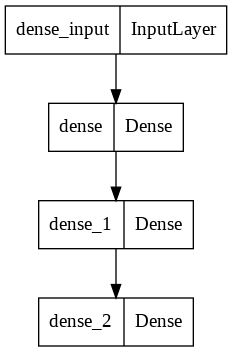

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_ann_Boruta.png')

In [ ]:
from google.colab import files
files.download('model_plot_ann_Boruta.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

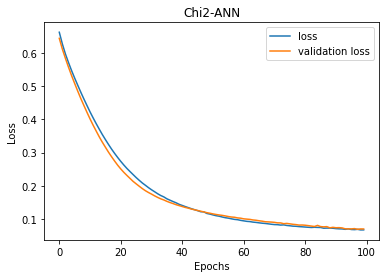

In [70]:
import matplotlib.pyplot as plt

fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Chi2-ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('Chi2-ANN.png', dpi=100)

In [71]:
from google.colab import files
files.download('Chi2-ANN.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 2ms/step


In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        65
           1       0.92      1.00      0.96        35

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



In [85]:
print(confusion_matrix(y_test,predictions))

[[62  3]
 [ 0 35]]


In [86]:
cnf_matrix = [[62, 3],[0, 35]]

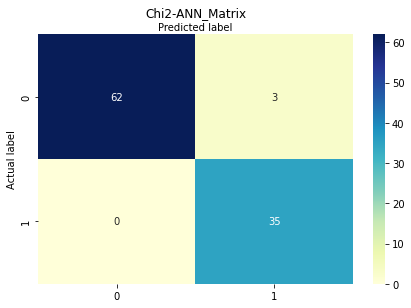

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Chi2-ANN_Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Chi2-ANN_Matrix.png')
plt.show()

In [90]:
from google.colab import files
files.download('Chi2-ANN_Matrix.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
from sklearn.metrics import accuracy_score
first = 0
second = 50
prediction_accuracy = []
for i in range(8):
  X_test_ = dataset.iloc[first:second,:-1].values
  y_true = dataset.iloc[first:second,-1].values

  X_test_  = scaler.transform(X_test_)

  y_pred = predictions = (model.predict(X_test) > 0.5).astype("int32")
  accuracy = accuracy_score(y_true, y_pred)
  prediction_accuracy.append(accuracy)

  first = second
  second = second+50
prediction_accuracy

4/4 [==============================] - 0s 6ms/step


ValueError: ignored

In [ ]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
predictions

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

ValueError: ignored

In [ ]:
#use model to predict probability that given y value is 1
y_pred_proba = model.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

AttributeError: ignored

NameError: ignored

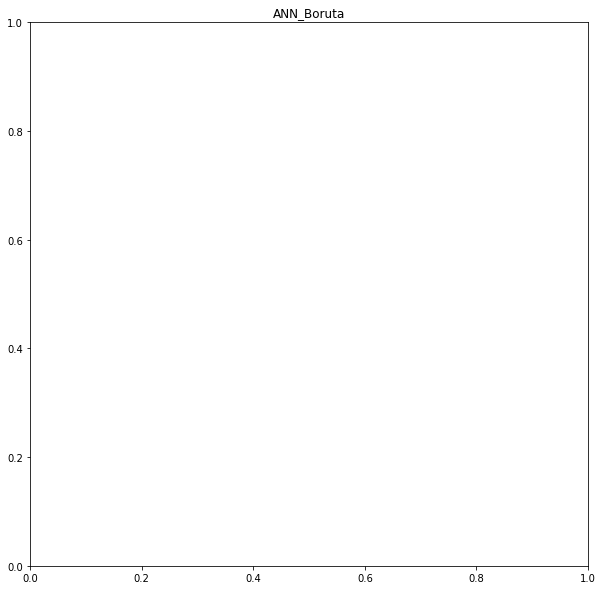

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ANN_Boruta')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
data = {
    'ANN_false': false_positive_rate,
    'ANN_true': true_positive_rate,
    'ANN_prediction_accuracy': prediction_accuracy
  }

In [ ]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.transpose()

In [ ]:
df.to_csv('ann_Boruta_output.csv', index=False)

In [ ]:
# from google.colab import files
# files.download('ann_Boruta_output.csv') 